In [1]:
%pylab
from scipy.optimize import curve_fit
from matplotlib import animation

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


#Informe Laboratorio 1

Estudiante: Sebastián Camilo Puerto

Código: 201318518

##Introducción

El experimento consiste en simular un gas formado por discos suaves que interactúan de acuerdo al potencial de Lennard Jones truncado. Las velocidades iniciales de las partículas tienen una distribución uniforme y sus posiciones iniciales se toman en una cuadrícula.

Se quiere demostrar que la distribución de las velocidades de las partículas, luego de que ha ocurrido suficiente tiempo para que se haya llegado a un equilibrio térmico, corresponde a la distribución de Rayleigh.

##Análisis de Resultados

La simulación hecha consiste en 1600 partículas que no interactuan entre sí, con una temperatura de 1 unidad, con una densidad de 0.3 particulas por unidad de área; inicialmente con una distribución de velocidades uniforme, ubicados inicialmente en una cuadrícula. 

La interacción de las partículas fue calculada con pasos cada 1ms, con un tiempo total de simulación de 5 segundos. Los datos se extrajeron cada 2 pasos.

In [2]:
#Extracción de datos de archivo csv
data = np.genfromtxt('Rayleigh.csv', delimiter = ',')

Extracción de información de posiciones:

In [3]:
xs = data[:, 0]
ys = data[:, 1]

#Variable con los tiempos correspondiente a cada cuadro de tiempo
t = linspace(0, 0.005 * 1000, len(xs) / 1600)

Animación con las posiciones de las partículas:

In [4]:
%pylab


fig = figure(2, figsize(8,8))

ax = fig.add_subplot(111, autoscale_on=False, xlim=(min(xs) - 0.1, max(xs) + 0.1), ylim=(min(ys) - 0.1, max(ys) + 0.1))
ax.grid()

plt.xlabel("Coordenada x")
plt.ylabel("Coordenada y")

line, = ax.plot([], [], 'go', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 1.01, '', transform=ax.transAxes)

dt = 0.01
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = xs[1600 * i : 1600 * (i + 1)]
    thisy = ys[1600 * i : 1600 * (i + 1)]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
    interval=10,blit=False, init_func=init)

show()

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


Analizando ahora para las rapideces, se extraen las velocidades y se calculan sus rapideces. Se extraen los datos del último cuadro de tiempo, donde se espera que se haya alcanzado el equilibrio térmico.

In [5]:
#Extracción de velocidades de cada partícula, y cálculo de sus rapideces
vx = data[:, 2]
vy = data[:, 3]
speeds = np.sqrt(vx**2 + vy**2)

#Separación de las velocidades del último cuadro de tiempo en una variable en una variable aparte

ultimas = speeds[len(speeds) - 1600 - 1 : ]

La distribución de Rayleigh está descrita por la siguiente función, con *k* factor para escalación de la función.

In [6]:
def prob(x, k):
    return x / (k**2) * np.exp(- x**2 / (2 * k**2))

Se generó el histograma de estas rapideces y se hizo el fit de éstos a una curva descrita por la distribución de Rayleigh.

Populating the interactive namespace from numpy and matplotlib


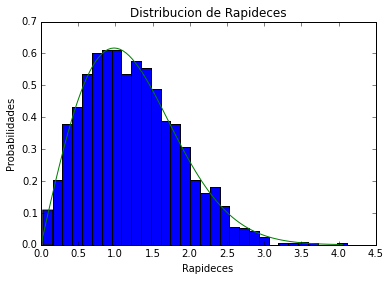

In [7]:
%pylab inline

figure(1)

#Histograma
probs = hist(ultimas, normed = True, bins = 31)

probabilidades = probs[0]
rapideces = probs[1]
rapideces = array([(rapideces[i-1] + rapideces[i])/ 2 for i in range(1, len(rapideces))]) #Promedio de extremos de cada bin

#Fit de la curva
par, err = curve_fit(prob, rapideces, probabilidades)

x = linspace(0, max(rapideces), 100)
y = prob(x, par[0])

plt.xlabel("Rapideces")
plt.ylabel("Probabilidades")
plt.title("Distribucion de Rapideces")

plot(x, y)

Se obtiene un factor de escalación de 0.9828, con desviación estándar de 0.0117, el cual se observa en la gráfica que describe de manera acertada la distribución de rapideces.

##Conclusiones

+ La distribución de rapideces de las partículas del gas en el equilibrio térmico está adecuadamente descrito por la distribución de Rayleigh